## TBA - A Tutorial on Analyzing and Interpreting Data
### Authors: Akshay Anil, Atul Bharati, Chaewoon Hong

Welcome to the tutorial on how to analyze data on Movies! This dataset was pulled from The Movies Database and is available on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), courtesy of The Movie Database (TMDb). The dataset contains information on around 5000 popular movies.

In this tutorial, we will be walking you step by step in how to approach this dataset in order to get the data that we want. We will be analyzing the data we collect with the help of visual graphics.

Our code is written in Python 3 on the Jupyter Notebook.

We start off by importing all the libraries that we will need in this project:
+ **pandas** - used to store our dataset in a table
+ **numpy**  - provides mathematical functions to help us analyze the data
+ **matplotlib** - allows us to graph our data
+ **warnings** - suppresses any warnings we run into

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


For this tutorial, we downloaded the dataset from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and saved it as movie_list.csv. Even though CSV stands for Comma-Separated Values, we need to confirm that other characters such as semi-colons are not used instead. We do this by opening the file with a text editor and searching for delimiters.


![CSV Commas](commas.png)


Here we see that commas are used, so we add `sep=','` as an argument to the `read_csv` function.

In [140]:
# Display the data as is from the source
movies = pd.read_csv('movie_list.csv', sep=',')

#display the first five rows 
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [141]:
# Limit movies to those that are in English and already Released for a fair comparison
movies = movies[movies.original_language == 'en']
movies = movies[movies.status == 'Released']
movies = movies[movies.budget != 0]
movies = movies[movies.revenue != 0]
# Remove any rows with missing data
movies.dropna(inplace=True)

Let's create some functions to split up the release_date so we can analyze changes over
months, days, and years. 

In [136]:
# Functions to split up release_date
def get_year(row):
    date = row['release_date']
    y, _, _ = date.split("-")
    return y
def get_month(row):
    date = row['release_date']
    _, m, _ = date.split("-")
    return m
def get_day(row):
    date = row['release_date']
    _, _, d = date.split("-")
    return d

In [142]:
# Create and set year, month, and day of release for each movie
movies['release_year'] = movies.apply(get_year, axis = 1)
movies['release_month'] = movies.apply(get_month, axis = 1)
movies['release_day'] = movies.apply(get_day, axis = 1)

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,release_month,release_day
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,12,10
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,05,19
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,10,26
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,07,16
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,03,07


Now let's trim down the number of columns by removing the columns that we will not be analyzing. 
We'll also be swapping some columns to make the dataframe easier to read. 

In [143]:
# Remove columns that are not vital for analysis
movies.drop(columns=['release_date', 'original_language', 'status', 'keywords', 'original_title', 'overview', 'homepage', 'id', 'production_companies', 'production_countries', 'spoken_languages', 'tagline'], inplace=True)

#swap the headers
# budget with title
col_list = list(movies)
col_list[0], col_list[5] = col_list[5], col_list[0]
# budget with popularity 
col_list[2], col_list[5] = col_list[5], col_list[2]

#swap the values of the columns
movies.columns = col_list
c = movies.columns
# budget with title
movies[[c[0], c[5]]] = movies[[c[5], c[0]]]
# budget with popularity 
movies[[c[2], c[5]]] = movies[[c[5], c[2]]]

movies.head()

,title,genres,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,162.0,150.437577,7.2,11800,2009,12,10
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,169.0,139.082615,6.9,4500,2007,05,19
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,148.0,107.376788,6.3,4466,2015,10,26
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,165.0,112.312950,7.6,9106,2012,07,16
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,132.0,43.926995,6.1,2124,2012,03,07


### Graphing

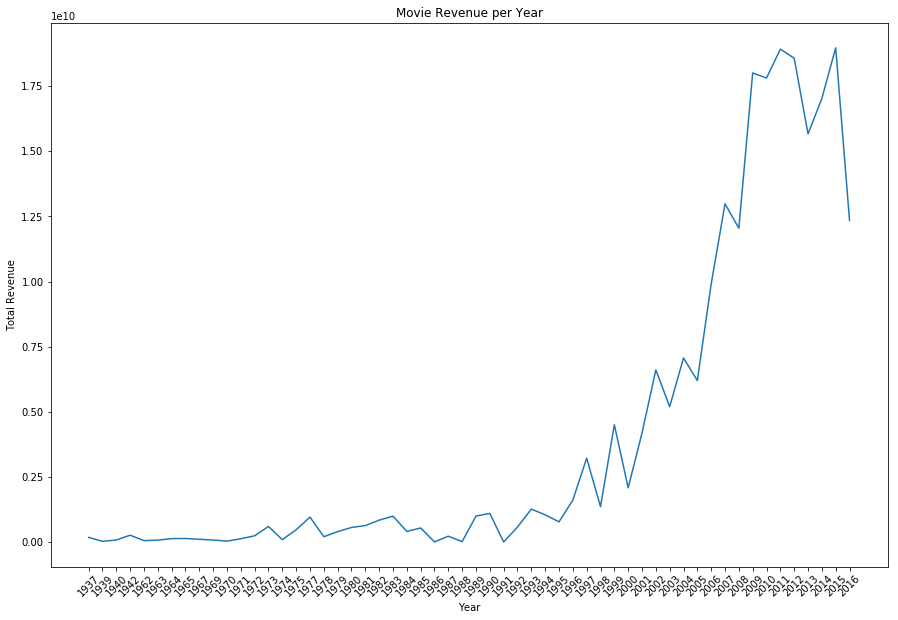

In [115]:
revenue_per_year = movies.groupby(['release_year'])['revenue'].sum()
revenue_per_year = pd.DataFrame({'release_year':revenue_per_year.index, 'total_revenue':revenue_per_year.values})
plt.figure(figsize=(15, 10));
plt.plot(revenue_per_year['release_year'], revenue_per_year['total_revenue'])
plt.title('Movie Revenue per Year')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

## Looking at the Genres 

Next we'll be looking at the genres of the movies and how they relate to the movie's popularity and ratings. We'll be using the same movies variable because it contains all the columns that we will be needing. 

In [144]:
#import re because we will be using regex
import re

# the format of the genres column is a string that looks like this: 
# [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]
# we only want the genres after "name":, so we will use regex to eliminate the other characters. 

#iterate through the rows
for index,row in movies.iterrows():
    #initialize a new string - this will replace the row value for genre to make it easier to read and extract
    str = ""
    # isolates the name: (genre) from the ids
    g = re.findall(r"name\": \"\w+", row['genres'])
    # g should now look like this: 
    # ['name": "Action', 'name": "Adventure', 'name": "Fantasy', 'name": "Science']
    
    #iterate through each item in g and remove everything but the genres
    for item in g:
        remove = re.search("name\": \"", i)
        str += (item[:remove.start()] + item[remove.end():]) + " "
    str = str[:-1]
        
    #replace the genre value with the new string 
    movies.at[index, 'genres'] = str        
        
movies.head()      

,title,genres,budget,revenue,runtime,popularity,vote_average,vote_count,release_year,release_month,release_day
0,Avatar,Action Adventure Fantasy Science,237000000,2787965087,162.0,150.437577,7.2,11800,2009,12,10
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,300000000,961000000,169.0,139.082615,6.9,4500,2007,05,19
2,Spectre,Action Adventure Crime,245000000,880674609,148.0,107.376788,6.3,4466,2015,10,26
3,The Dark Knight Rises,Action Crime Drama Thriller,250000000,1084939099,165.0,112.312950,7.6,9106,2012,07,16
4,John Carter,Action Adventure Science,260000000,284139100,132.0,43.926995,6.1,2124,2012,03,07


In [154]:
# get all the possible genres from the list
genres = {}
average_counter = {}
for index, row in movies.iterrows():
    list_of_genres = re.split(" ", row['genres'])
    for item in list_of_genres:
        if item not in genres:
            genres[item] = 0
            average_counter[item] = 0
        else:
            genres[item] += row['vote_average']
            average_counter[item] += 1
        
genres

{'Action': 2403.5000000000014,
 'Adventure': 1901.5000000000002,
 'Fantasy': 985.1,
 'Science': 1204.3999999999996,
 'Crime': 1150.6999999999998,
 'Drama': 3162.300000000001,
 'Thriller': 2176.1000000000004,
 'Animation': 687.4999999999997,
 'Family': 1047.8999999999994,
 'Western': 61.099999999999994,
 'Comedy': 2465.2999999999997,
 'Romance': 1194.999999999999,
 'Horror': 674.6,
 'Mystery': 545.0000000000002,
 'War': 192.50000000000003,
 'History': 237.5,
 'Music': 190.20000000000002,
 'Documentary': 100.60000000000001,
 'Foreign': 0}

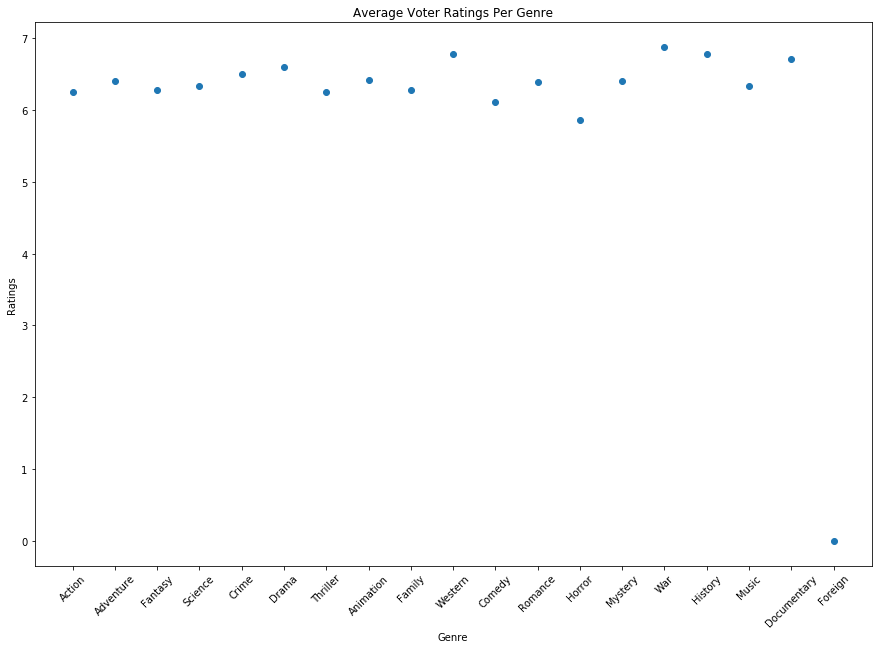

In [164]:
average_ratings = []

for (sum,denom) in zip(genres.values(),average_counter.values()):
    if denom != 0:
        average_ratings.append(sum/denom)
    else:
        average_ratings.append(0)
        
plt.figure(figsize=(15, 10))
plt.scatter(genres.keys(), average_ratings)
plt.title('Average Voter Ratings Per Genre')
plt.ylabel('Ratings')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()